In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [29]:
from sklearn.metrics import (roc_curve,auc)

In [4]:
df = pd.read_csv(r"C:\Users\laptop\Downloads\lung_cancer\survey lung cancer.csv")


In [5]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (309, 16)
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                  

In [6]:
df["LUNG_CANCER"] = df["LUNG_CANCER"].map({"NO": 0, "YES": 1})

In [7]:
binary_cols = df.columns.drop(["GENDER", "AGE", "LUNG_CANCER"])
df[binary_cols] = df[binary_cols].replace({1: 0, 2: 1})

In [8]:
df["GENDER"] = df["GENDER"].map({"M": 1, "F": 0})

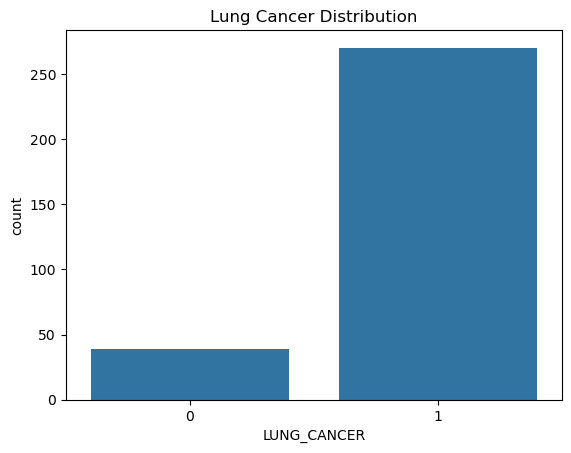

In [9]:
sns.countplot(x="LUNG_CANCER", data=df)
plt.title("Lung Cancer Distribution")
plt.show()


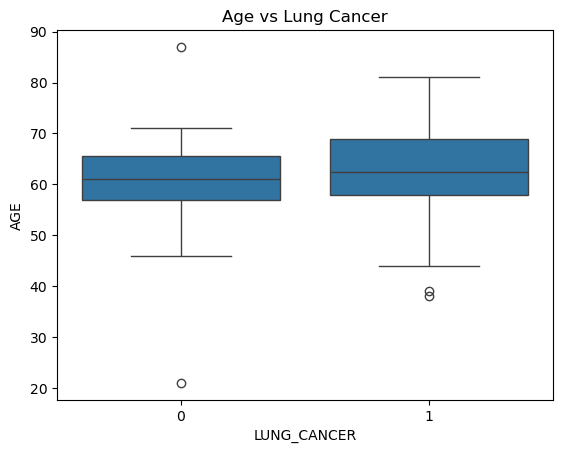

In [10]:
sns.boxplot(x="LUNG_CANCER", y="AGE", data=df)
plt.title("Age vs Lung Cancer")
plt.show()

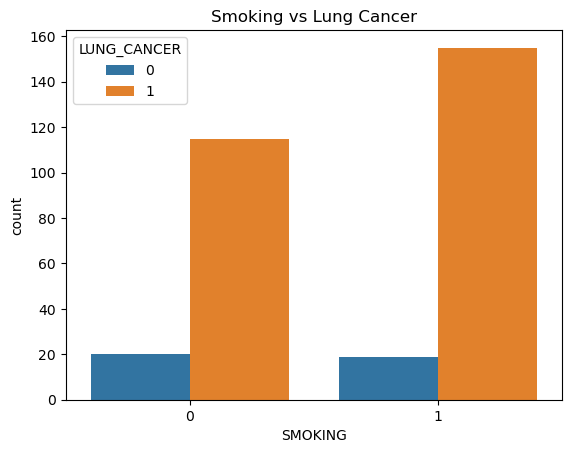

In [11]:
sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df)
plt.title("Smoking vs Lung Cancer")
plt.show()


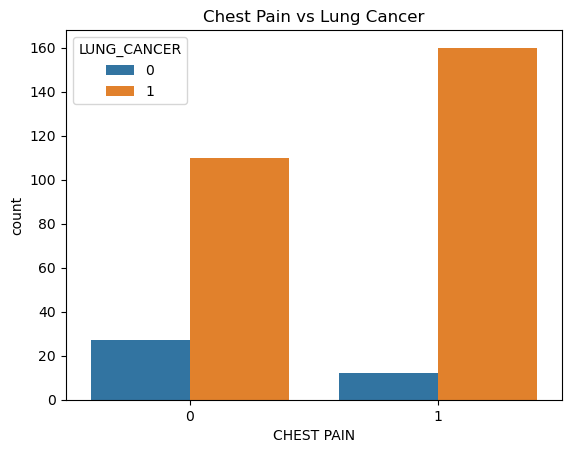

In [13]:
sns.countplot(x="CHEST PAIN", hue="LUNG_CANCER", data=df)
plt.title("Chest Pain vs Lung Cancer")
plt.show()

In [14]:
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [23]:

y_pred_lin = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lin)

print("\nLinear Regression MSE:", mse)




Linear Regression MSE: 0.05245930616703602


In [24]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [25]:
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [26]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)




RandomForestClassifier(n_estimators=200, random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



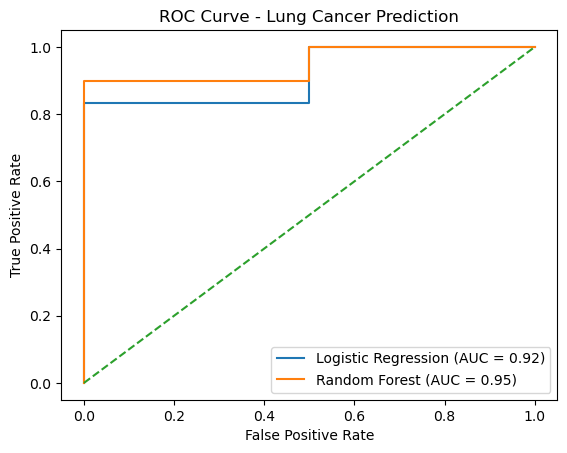

In [28]:

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Lung Cancer Prediction")
plt.legend()
plt.show()

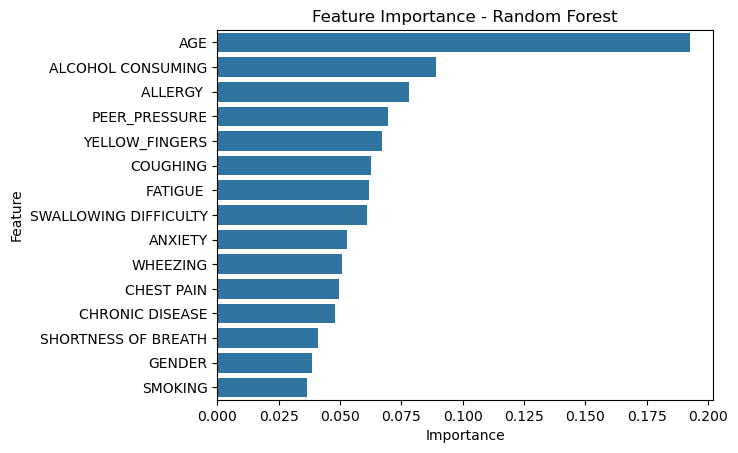

In [20]:
importances = rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importance - Random Forest")
plt.show()